In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime
import re

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chithsabesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from wordcloud import WordCloud


In [4]:
attacks = pd.read_csv('attacks.csv',engine='python')

In [5]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 16 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
dtypes: int64(1), object(15)
memory usage: 749.1+ KB


In [6]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [7]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 16 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
dtypes: int64(1), object(15)
memory usage: 749.1+ KB


In [168]:
#attacks = attacks.dropna(axis=0)

# 1) How are attacks on a yearly basis

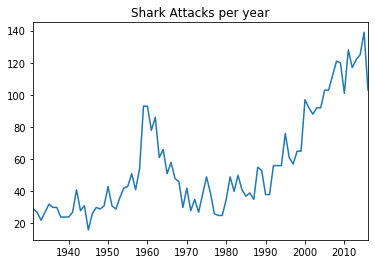

In [8]:
attacks['Years'] = attacks[attacks['Year']>1930]['Year']
Years = attacks['Years'].value_counts().sort_index()

%matplotlib inline
Years.plot(title="Shark Attacks per year")

# Sharp increase after 1980 can be attributed to the fact that reporting of shark attacks became better and also human encroachment into the oceans

In [9]:
#Let us check the percentage of unprovoked to provoked attacks
attacks['Type'].value_counts()/attacks.shape[0]*100


Unprovoked      73.197597
Provoked         9.295728
Invalid          8.661549
Sea Disaster     3.671562
Boat             3.337784
Boating          1.835781
Name: Type, dtype: float64

In [10]:
#Lets check the percentages of male and female attacks
attacks['Sex '].value_counts()/attacks.shape[0]*100


M      80.690921
F       9.763017
M       0.033378
.       0.016689
N       0.016689
lli     0.016689
Name: Sex , dtype: float64

In [11]:
#Lets check the ages
len(attacks['Age'].unique())

158

In [12]:
#Lets check out fatalities
attacks['Fatal (Y/N)'].value_counts()/attacks.shape[0]*100


N                 72.012684
Y                 25.901202
UNKNOWN            1.568758
 N                 0.133511
n                  0.016689
--M524--M3133Y     0.016689
F                  0.016689
N                  0.016689
Name: Fatal (Y/N), dtype: float64

In [13]:
attacks = attacks.replace({'Boat':'Unprovoked','Sea Disaster':'Unprovoked','Boating':'Unprovoked'})

# 2) What were the attack types?

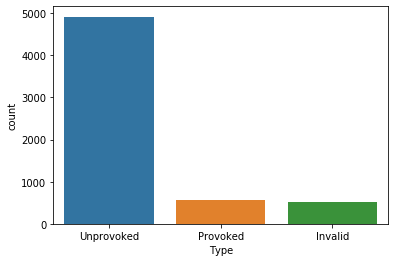

In [14]:
#Lets count provoked and unprovoked attacks
sns.countplot(x='Type',data=attacks)

# Most of the attacks are unprovoked as no one goes to intentionally provoke sharks except maybe fishermen

# 3) The countries with most attacks

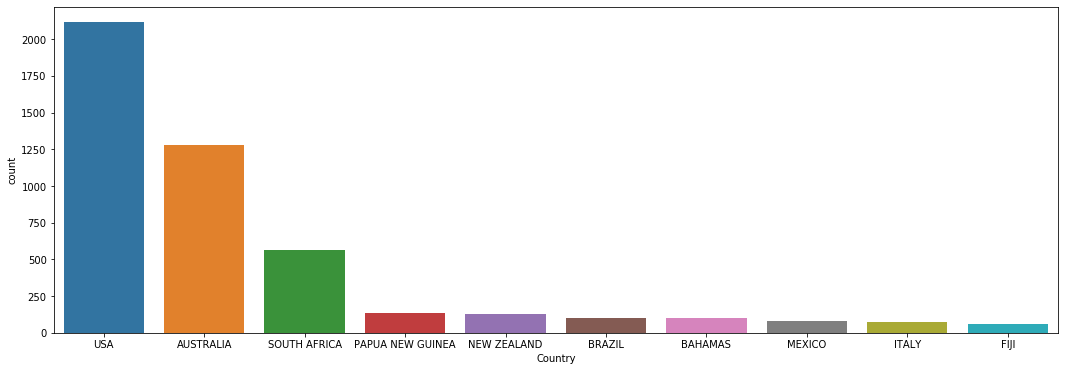

In [210]:
#Lets count the countries with most attacks
plt.figure(figsize=(18,6 ))
sns.countplot(x='Country',data=attacks,order=attacks.Country.value_counts().iloc[:10].index)

# Most of these countries have a large coastline and have a large fishery industries

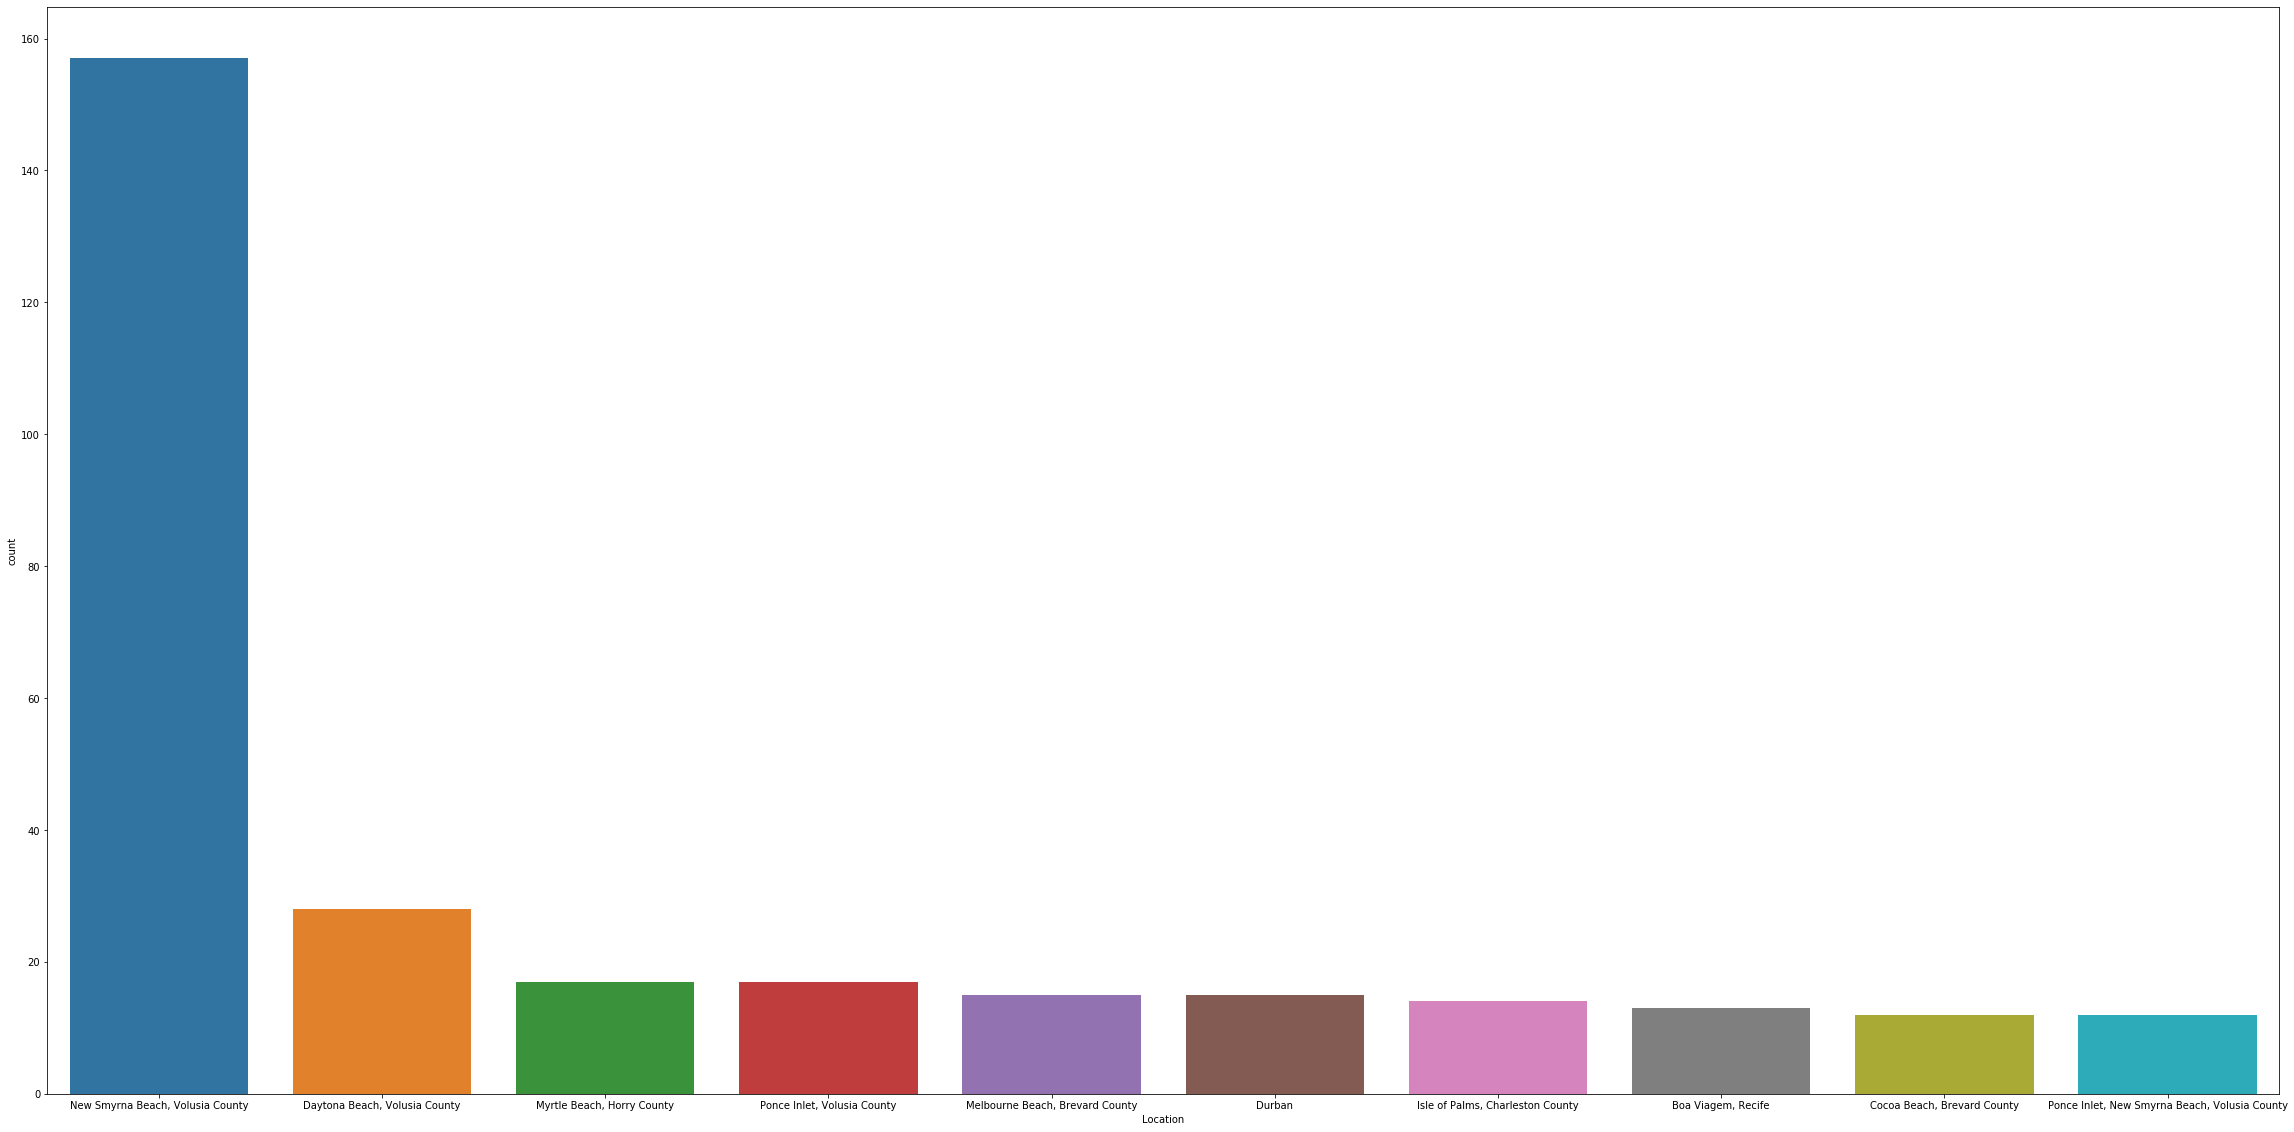

In [211]:
plt.figure(figsize=(40,20))
sns.countplot(x='Location',data=attacks,order=attacks.Location.value_counts().iloc[:10].index)

# 4) Which areas do most attacks happen?

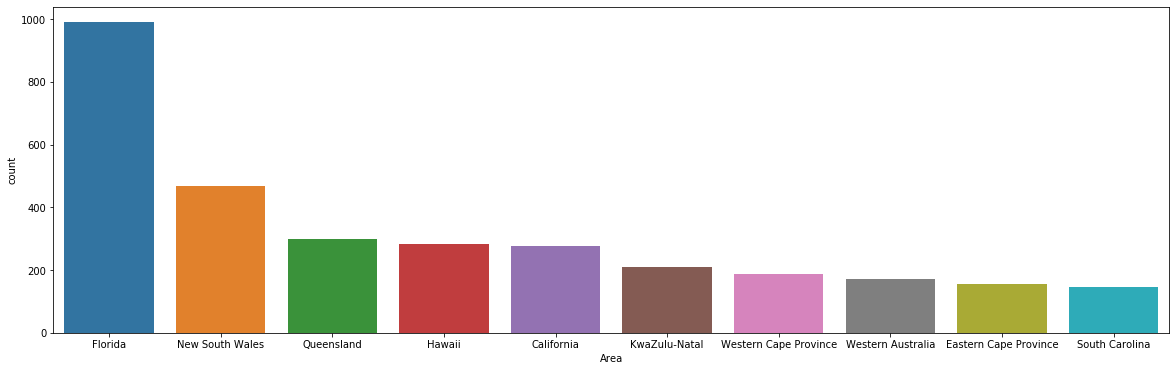

In [15]:
plt.figure(figsize=(20,6 ))
sns.countplot(x='Area',data=attacks,order=attacks.Area.value_counts().iloc[:10].index)

# 5) Which gender is the most attacked?

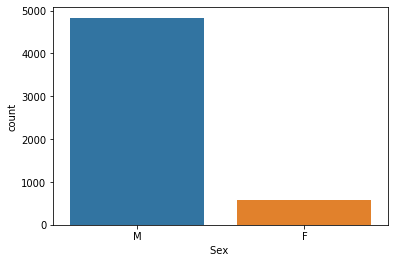

In [18]:
#Count the gender 
attacks = attacks[(attacks['Sex ']!='lli') & (attacks['Sex ']!='M ') & (attacks['Sex ']!='N')&(attacks['Sex ']!='.')]
sns.countplot(x='Sex ',data=attacks)

# 6)Which activity is the most risky?

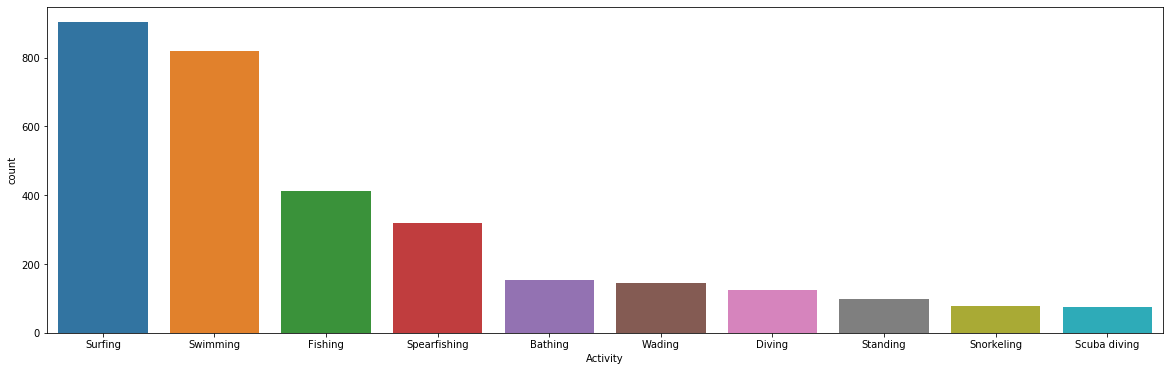

In [19]:
#Count the activities
plt.figure(figsize=(20,6 ))
sns.countplot(x='Activity',data=attacks,order=attacks.Activity.value_counts().iloc[:10].index)


In [20]:
attacks = attacks.rename(columns={'Fatal (Y/N)': "Is_Fatal"})

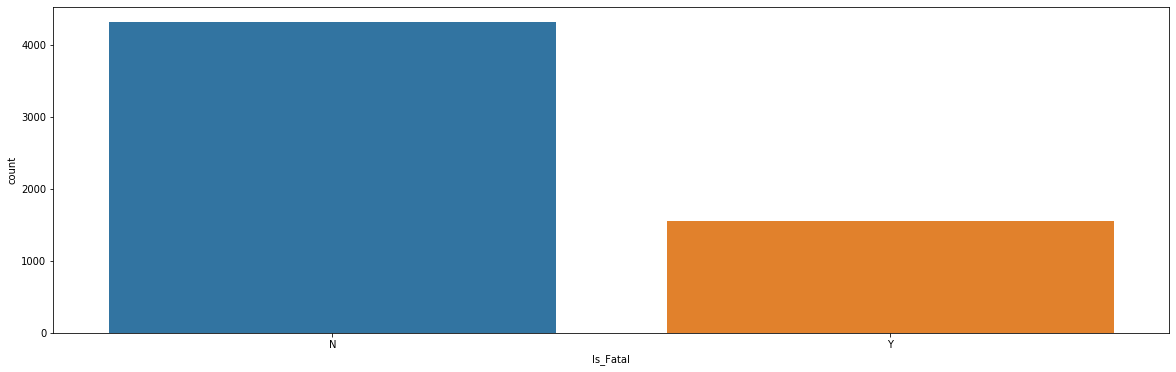

In [23]:
#The fatalities and non-fatalities
attacks = attacks[(attacks['Is_Fatal']!=' N') & (attacks['Is_Fatal']!='UNKNOWN') & (attacks['Is_Fatal']!='F') & (attacks['Is_Fatal']!='N ') & (attacks['Is_Fatal']!='n')&(attacks['Is_Fatal']!='--M524--M3133Y')]
plt.figure(figsize=(20,6 ))
sns.countplot(x='Is_Fatal',data=attacks)

In [25]:

attacks['Age'] = attacks['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)

In [26]:
attacks = attacks[attacks['Age']<100]

In [27]:
attacks.shape

(3260, 17)

# 7) How are the ages distributed

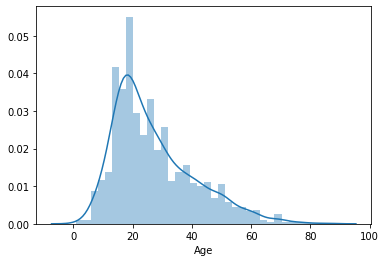

In [28]:
sns.distplot(attacks['Age'])

In [29]:
attacks['Age'].mean()

27.080674846625765

# There is a slight positive skew on the ages with the maximum peak between 15 and 35 since most of the teenagers and middle age adults enter the water

# 8)Distribution of both fatal and non-fatal attacks

In [30]:
non_fatal_attacks = attacks[attacks["Is_Fatal"]=='N']

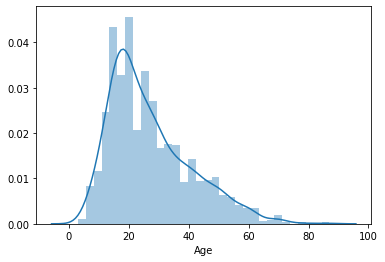

In [31]:
sns.distplot(non_fatal_attacks['Age'])

In [32]:
non_fatal_attacks['Age'].mean()

26.97969543147208

In [33]:
fatal_attacks = attacks[attacks["Is_Fatal"]=='Y']

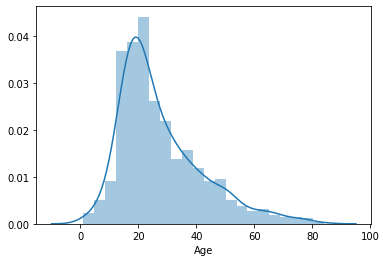

In [34]:
sns.distplot(fatal_attacks['Age'])

In [35]:
fatal_attacks['Age'].mean()

27.51300578034682

# No difference between average age for both fatalities and non-Fatalities

# 9) Which species attacks the most?

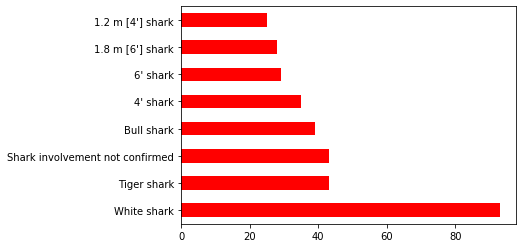

In [36]:
#Which species of Shark attack most
sharks = attacks['Species '].value_counts()
sharks[sharks>20].plot.barh(color='Red')

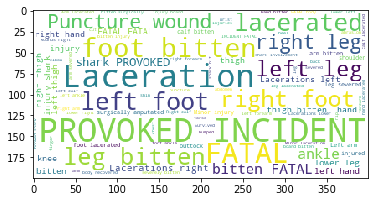

In [37]:
#Lets do some text analysis on injury column
input_string = ' '.join(attacks['Injury'])
wc = WordCloud(background_color='white').generate(input_string)
plt.imshow(wc)

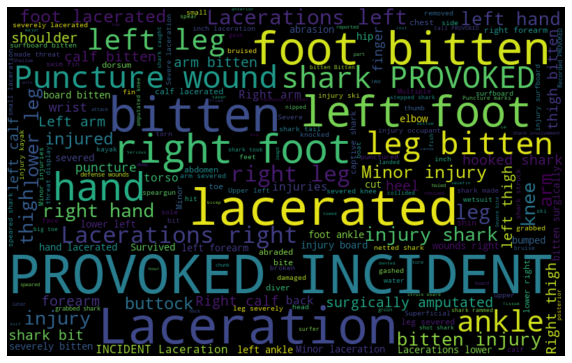

In [38]:
#Words in non fatal attacks
normal_words =' '.join([text for text in attacks['Injury'][attacks['Is_Fatal'] == 'N']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



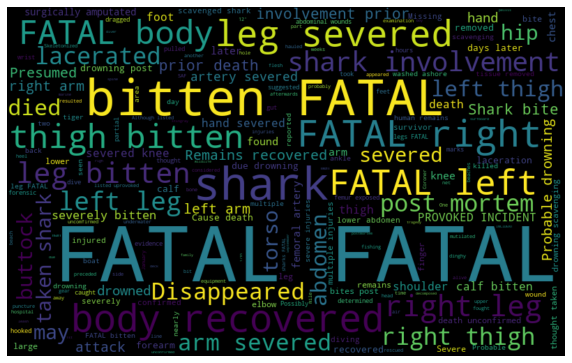

In [39]:
#Words in  fatal attacks
normal_words =' '.join([text for text in attacks['Injury'][attacks['Is_Fatal'] == 'Y']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 10) Does provocation lead to fatality

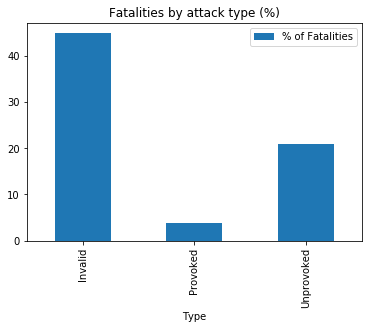

In [43]:
#Lets check out whether provocation leads to fatality
df_Activity = pd.DataFrame(columns=["Type", "% of Fatalities"])
i=0
for activity in list(attacks['Type'].unique()):
    ratio = attacks[(attacks['Type']==activity)&(attacks['Is_Fatal']=='Y')].shape[0] / attacks[attacks['Type']==activity].shape[0]
    df_Activity.loc[i] = (activity, ratio*100)
    i += 1
     
df_type = df_Activity.groupby(by="Type").sum()
df_type.plot(kind='bar',title='Fatalities by attack type (%)')

# No unprovoked attacks always tend to have more fatalities here both Unprovoked and Invalid have high fatalities (Since most shark attacks happen due to mistaken identity and not due to any provocation)

In [62]:
attacks = attacks.dropna(axis=0)

# 11) Which gender has more fatalities

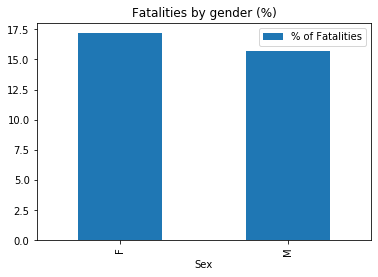

In [65]:
df_gender = pd.DataFrame(columns=["Sex", "% of Fatalities"])
i=0
for gender in list(attacks['Sex '].unique()):
    ratio = attacks[(attacks['Sex ']==gender)
                    &(attacks['Is_Fatal']=='Y')].shape[0] / attacks[attacks['Sex ']==gender].shape[0]
    df_gender.loc[i] = (gender, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_gender = df_gender.groupby(by="Sex").sum()
df_gender.plot(kind='bar',title='Fatalities by gender (%)')

# Weirdly females have more fatalities then males

# 12) Which country has more fatalities

In [75]:
Countries = attacks.groupby('Country').size()

In [76]:
Countries = Countries[Countries>10]

In [77]:
Countries = Countries.to_frame()
Countries 

,0
Country,
AUSTRALIA,273
BAHAMAS,25
BRAZIL,14
MEXICO,13
NEW ZEALAND,20
PAPUA NEW GUINEA,12
REUNION,15
SOUTH AFRICA,210
USA,681


In [78]:
Countries = Countries.rename(columns={0:'Count'})

In [79]:
attacks = pd.merge(attacks, Countries, on='Country')

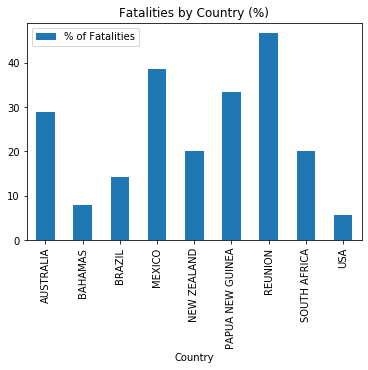

In [80]:
df_Country = pd.DataFrame(columns=["Country", "% of Fatalities"])
i=0
for country in list(attacks['Country'].unique()):
    ratio = attacks[(attacks['Country']==country)
                    &(attacks['Is_Fatal']=='Y')].shape[0] / attacks[attacks['Country']==country].shape[0]
    df_Country.loc[i] = (country, ratio*100)
    i += 1
    #print("In {}, the ratio of Promotions is {:.2f}%".format(field, ratio*100))    
df_Countries = df_Country.groupby(by="Country").sum()
df_Countries.plot(kind='bar',title='Fatalities by Country (%)')

# Over 40 % of attacks in Reunion are fatal also it should be noted that the number of attacks in Reunion is only 15
# Mexico and Papua New Guinea have similar case